Importing relevant libraries.

In [56]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import mean_squared_error
%matplotlib inline


import pickle

In [57]:
sales=pd.read_csv('MCar.csv')

In [58]:
sales.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


<Axes: >

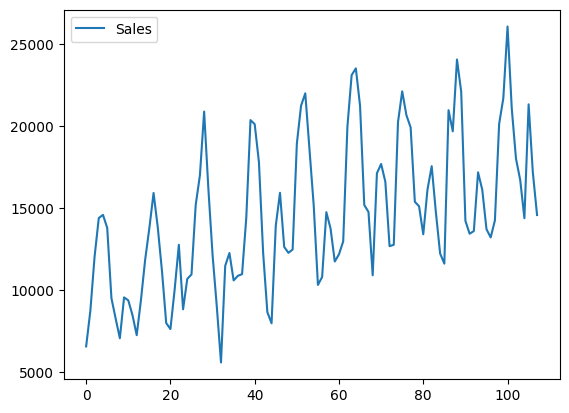

In [59]:
sales.plot()

In [60]:
sales.tail()

,Month,Sales
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180
107,1968-12,14577


In [61]:
sales.describe()

,Sales
count,108.000000
mean,14595.111111
std,4525.213913
min,5568.000000
25%,11391.250000
50%,14076.000000
75%,17595.750000
max,26099.000000


In [62]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Sales   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [63]:
sales['Month'] = pd.to_datetime(sales['Month'], format='%Y-%m')

In [64]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   108 non-null    datetime64[ns]
 1   Sales   108 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


In [65]:
sales.head()

,Month,Sales
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [66]:
sales.tail()

,Month,Sales
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180
107,1968-12-01,14577


In [67]:
sales.set_index('Month', inplace=True)

<Axes: xlabel='Month'>

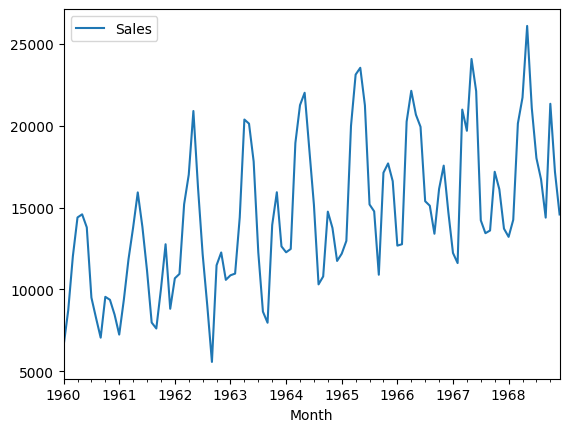

In [68]:
sales.plot()

In [69]:
from statsmodels.tsa.stattools import adfuller

In [70]:
test_result= adfuller(sales['Sales'])

In [71]:
#H0: NON STATIONARY
#H1: STATIONARY

def adfuller_test(Sales):
  result=adfuller(Sales)
  labels= ['ADF Test Statistic','P-Value','Lags Used','No. Of Observations Used']
  for value, label in zip(result, labels):
    print(label+':'+str(value) )

  if result[1] <=0.05:
    print('Strong evidece against null hypothesis(H0), reject the null hypothesis.')

  else:
    print('Weak evidence against the null hypothesis, accept null hypothesis.')

In [72]:
adfuller_test(sales['Sales'].dropna())

ADF Test Statistic:-1.2238127661752858
P-Value:0.6632691049832861
Lags Used:12
No. Of Observations Used:95
Weak evidence against the null hypothesis, accept null hypothesis.


In [73]:
sales['Sales First Difference'] = sales['Sales'] - sales['Sales'].shift(12)

In [74]:
sales['Sales'].shift(1)

Month
1960-01-01        NaN
1960-02-01     6550.0
1960-03-01     8728.0
1960-04-01    12026.0
1960-05-01    14395.0
               ...   
1968-08-01    18024.0
1968-09-01    16722.0
1968-10-01    14385.0
1968-11-01    21342.0
1968-12-01    17180.0
Name: Sales, Length: 108, dtype: float64

In [75]:
sales.head()

,Sales,Sales First Difference
Month,,
1960-01-01,6550,NaN
1960-02-01,8728,NaN
1960-03-01,12026,NaN
1960-04-01,14395,NaN
1960-05-01,14587,NaN


In [76]:
adfuller_test(sales['Sales First Difference'].dropna())

ADF Test Statistic:-3.6443966024060126
P-Value:0.00496683358657978
Lags Used:11
No. Of Observations Used:84
Strong evidece against null hypothesis(H0), reject the null hypothesis.


<Axes: xlabel='Month'>

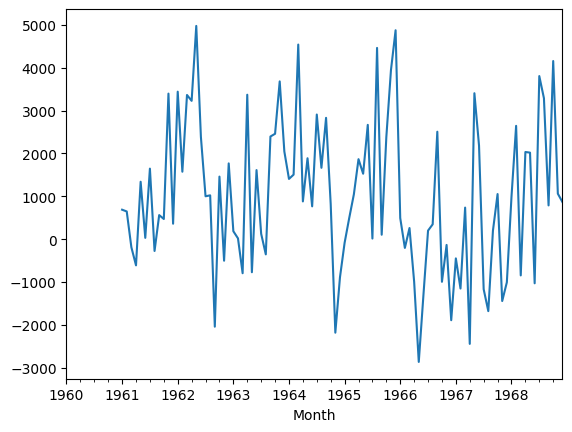

In [77]:
sales['Sales First Difference'].plot()

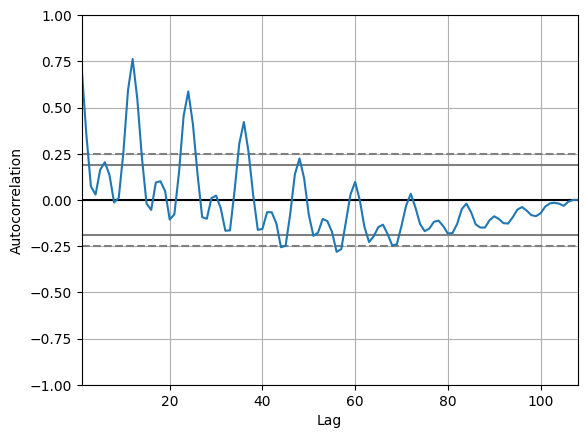

In [78]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sales['Sales'])
plt.show()

In [79]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

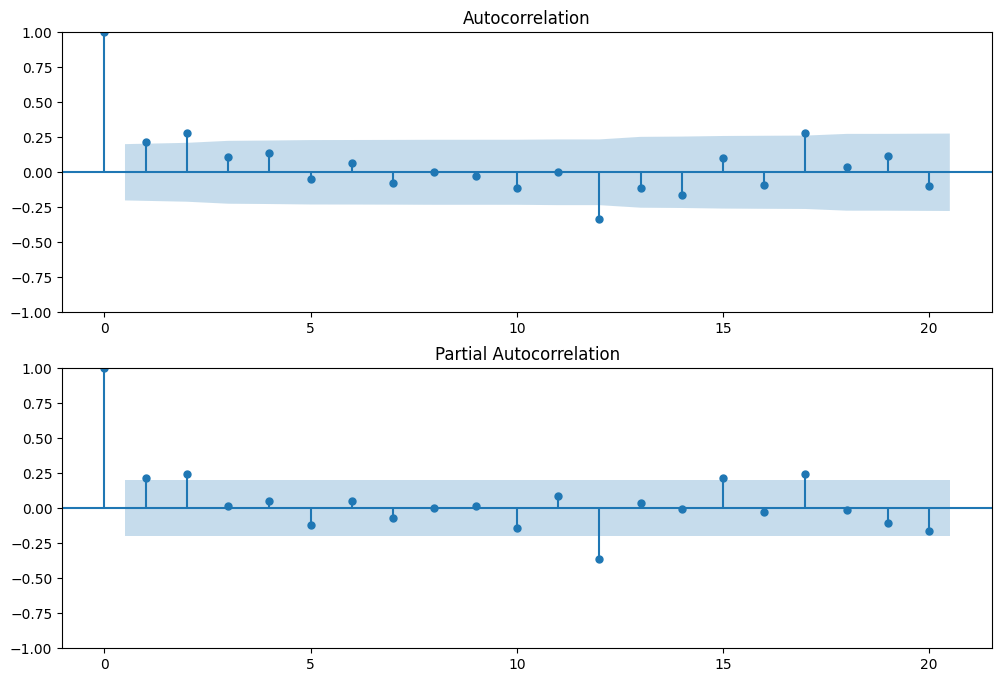

In [80]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sales['Sales First Difference'].iloc[13:], lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sales['Sales First Difference'].iloc[13:], lags=20, ax=ax2)

p=1, q=0/1, d=0

In [81]:
model = sm.tsa.statespace.SARIMAX(sales['Sales'], order=(2,1,2), seasonal_order=(2,1,2,12))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible sta

In [82]:
model.fit().summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  108
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -837.163
Date:                            Sun, 29 Oct 2023   AIC                           1692.325
Time:                                    05:16:23   BIC                           1715.310
Sample:                                01-01-1960   HQIC                          1701.613
                                     - 12-01-1968                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7802      0.789      0.989      0.323      -0.767       2.327
ar.L2         -0.0014      0.293     -0.005      0.996      -0.576       0.573
ma.L1         -1.4913      0.781     -1.910      0.056      -3.022       0.039
ma.L2          0.5176      0.706      0.734      0.463      -0.865       1.900
ar.S.L12      -1.3630      0.341     -3.994      0.000      -2.032      -0.694
ar.S.L24      -0.6953      0.342     -2.035      0.042      -1.365      -0.026
ma.S.L12       1.0410      0.478      2.180      0.029       0.105       1.977
ma.S.L24       0.3776      0.503      0.751      0.453      -0.608       1.363
sigma2      3.267e+06   5.25e-07   6.23e+12      0.000    3.27e+06    3.27e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 2.23
Prob(Q):                              0.65   Prob(JB):                         0.33
Heteroskedasticity (H):               1.24   Skew:                             0.33
Prob(H) (two-sided):                  0.55   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.31e+28. Standard errors may be unstable.
"""

<Axes: xlabel='Month'>

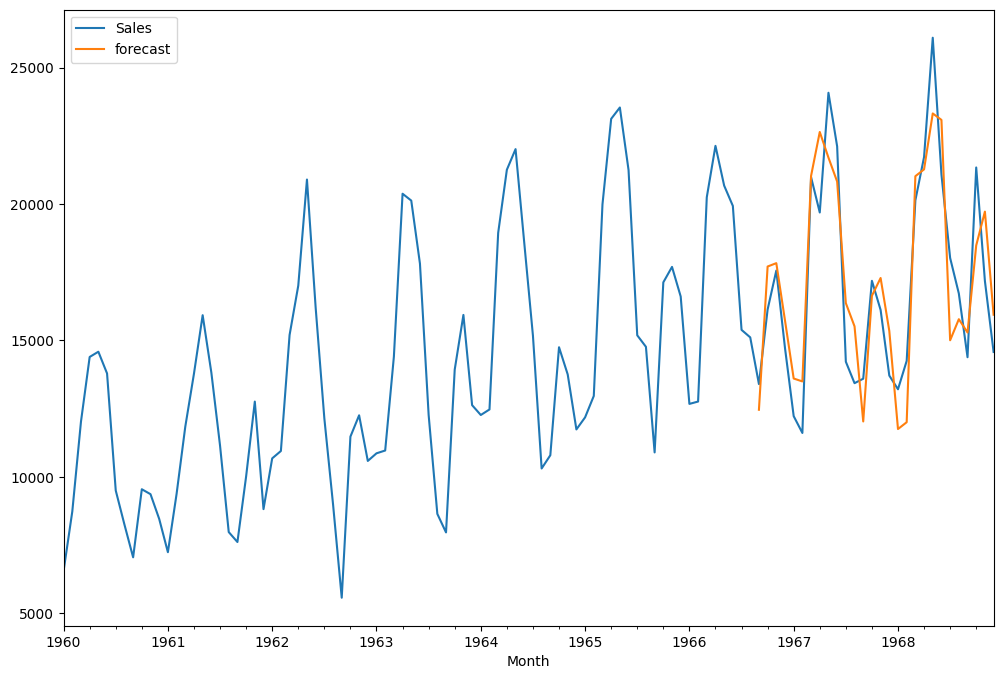

In [83]:
sales['forecast']=results.predict(start=80, end=108, dynamic=False)
sales[['Sales', 'forecast']].plot(figsize=(12,8))

In [84]:
actual_values= sales['Sales'][90:108]
predicted_values= sales['forecast'][90:108]

In [85]:
mse = mean_squared_error(actual_values, predicted_values)

In [86]:
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

RMSE: 1870.26


In [87]:
future_dates=[sales.index[-1] + DateOffset(months=x)for x in range(0,24)]

In [88]:
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=sales.columns)

In [89]:
future_dates_df.tail()

,Sales,Sales First Difference,forecast
1970-07-01,NaN,NaN,NaN
1970-08-01,NaN,NaN,NaN
1970-09-01,NaN,NaN,NaN
1970-10-01,NaN,NaN,NaN
1970-11-01,NaN,NaN,NaN


In [94]:
future_dates_df.drop('Sales First Difference', inplace=True, axis=1)

In [90]:
future_df= pd.concat([sales,future_dates_df])

<Axes: >

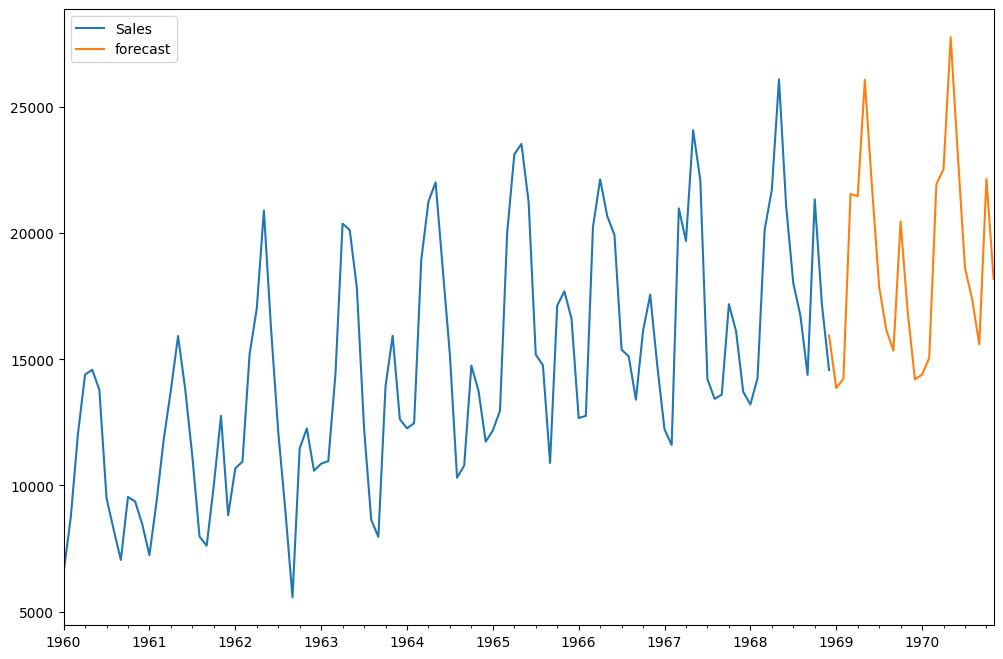

In [95]:
future_df['forecast']= results.predict(start=107, end=132, dynamic=False)
future_df[['Sales','forecast']].plot(figsize=(12,8))

In [96]:
future_df.to_csv('FinalResult2.csv')


In [97]:
pickle.dump(results, open('sari.pkl','wb'))

In [ ]:
pickled_model = pickle.load(open('sari.pkl','rb'))